In [1]:
from math import pi, tan, sin, cos
import numpy as np
import matplotlib.pyplot as plt

## Newton and Lagrange spline's

In [2]:
def f(x):
    return 1/tan(x)

In [3]:
x_a = [pi/8, 2*pi/8, 3*pi/8, 4*pi/8]
y_a = [f(_) for _ in x_a]

x_b = [pi/8, 5*pi/16, 3*pi/8, pi/2]
y_b = [f(_) for _ in x_b]

x_star = pi/3
y_star = f(x_star)

## Newton

In [11]:
def divided_diff(x, y):
    n = len(y)
    coef = []
    for i in range(len(x)):
        r = [y[i]]
        for j in range(len(x)-1):
            r.append(0)
        coef.append(r)
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
    return coef

In [12]:
def Newton(X, x, y):
    coef = divided_diff(x, y)
    res, cof = coef[0][0], []
    for i in range(1,len(coef)):
        cof.append(coef[0][i])
    for i in range(len(cof)):
        for j in range(i+1):
            cof[i] *= (X - x[j])
        res += cof[i]
    return res

## Lagrange

In [13]:
def Lagrange(X,x,y):
    res = 0
    for i in range(len(x)):
        f_i = y[i]
        for j in range(len(y)):
            if j != i:
                f_i *= (X - x[j]) / (x[i] - x[j])
        res += f_i
    return res

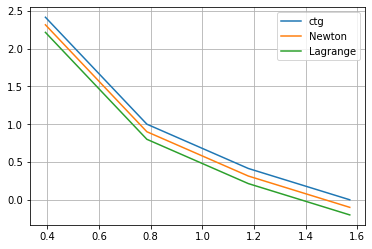

In [14]:
plt.plot(x_a, y_a, label='ctg')
plt.plot(x_a, [Newton(_,x_a,y_a)-0.1 for _ in x_a], label='Newton')
plt.plot(x_a, [Lagrange(_,x_a,y_a)-0.2 for _ in x_a], label='Lagrange')
plt.legend()
plt.grid()

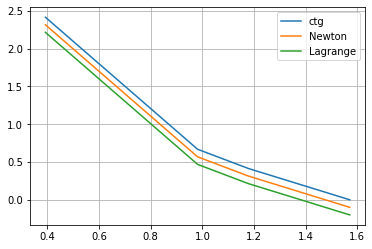

In [15]:
plt.plot(x_b, y_b, label='ctg')
plt.plot(x_b, [Newton(_,x_b,y_b)-0.1 for _ in x_b], label='Newton')
plt.plot(x_b, [Lagrange(_,x_b,y_b)-0.2 for _ in x_b], label='Lagrange')
plt.legend()
plt.grid()

In [10]:
print('a-Newton)', abs(f(x_star) - Newton(x_star, x_a,y_a)))
print('a-Lagrange)', abs(f(x_star) - Lagrange(x_star, x_a,y_a)))

print('b-Newton)', abs(f(x_star) - Newton(x_star, x_b,y_b)))
print('b-Lagrange)', abs(f(x_star) - Lagrange(x_star, x_b,y_b)))

a-Newton) 0.0193754606353872
a-Lagrange) 0.019375460635387087
b-Newton) 0.0038548965315182704
b-Lagrange) 0.0038548965315179373
